In [1]:
import sys
import os
path = os.path.abspath(os.path.join('..','..'))
sys.path.append(path)

import numpy as np
from datetime import date, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from reservoirpy.wellproductivitypy import decline as dc

# Forecast using WOR vs Np Relationship

The forecasting method using WOR vs Np relationship can be estimated by creating the `wor_declination` object. Its attributes are: The slope of the `ln(wor+1)/Np`; Initial Bsw `bsw_i`. 

In [2]:
# wor_declination initialized with Initial Bsw 
w = dc.wor_declination(slope=2e-6,bsw_i=0.75)


In [3]:
print('Attributes of object initialized with bsw_i')
print(w.bsw_i)
print(w.wor_i)


Attributes of object initialized with bsw_i
0.75
3.0


## Forecast method


In [4]:
f= w.forecast(
    start_date=date(2020,5,21), 
    end_date=date(2025,6,21),
    fq='M', 
    fluid_rate=5000)
f

,qf,qo,qw,bsw,wor_1,wor,np
2020-05-31,5000,1250.000000,3750.000000,0.750000,4.000000,3.000000,1250.000000
2020-06-30,5000,1246.878903,3753.121097,0.750624,4.010013,3.010013,38656.367090
2020-07-31,5000,1157.000427,3842.999573,0.768600,4.321520,3.321520,74523.380322
2020-08-31,5000,1076.911035,3923.088965,0.784618,4.642909,3.642909,107907.622419
2020-09-30,5000,1007.355224,3992.644776,0.798529,4.963492,3.963492,138128.279146
...,...,...,...,...,...,...,...
2025-01-31,5000,237.918485,4762.081515,0.952416,21.015601,20.015601,836860.831333
2025-02-28,5000,234.434720,4765.565280,0.953113,21.327899,20.327899,843425.003480
2025-03-31,5000,231.377095,4768.622905,0.953725,21.609745,20.609745,850597.693410
2025-04-30,5000,228.081596,4771.918404,0.954384,21.921979,20.921979,857440.141300


# Forecast with different fluid Rate

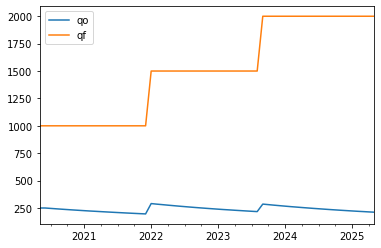

In [5]:
f= w.forecast(
    start_date=date(2020,5,21), 
    end_date=date(2025,6,21),
    fq='M', 
    fluid_rate=np.array([1000]*20 + [1500]*20 + [2000]*21))
f.plot(y=['qo','qf'])